Эта штука очень капризная:
 - Если что-то не строится, нужно перезапустить """X""", """Y""" или """YL"""(если там пишет ...float64..., то надо перезапустить X, если про dementions то X и Y)

In [1]:
import numpy as np
import math

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.polynomial.chebyshev as cheb

In [16]:
""" X """
nL = 9 # к-во точек в многочлене Лагранжа
nC = 9  # степень Чебышева
xk = np.linspace(-1, 1, nL)
x = np.linspace(-1.0, 1.0, 500)
len(x)

500

In [17]:
""" Y """
yk = [1 / (1 + 25 * x**2) for x in xk]
y = [1 / (1 + 25 * x**2) for x in x]
len (y)

500

In [4]:
""" 5 """
def lag(xval, xk, yk):
    
    return sum(yk[k] * lag_k(xval, xk, k) for k in range(len(xk)))

def lag_k(xval, xk, k):
    
    
    ch,zn=1.0, 1.0
    for i in range(len(xk)):
        if i==k:
            continue
        ch *= (xval-xk[i])
        zn *= (xk[k] - xk[i]) 
    return(ch/zn)

    
if __name__=="__main__":

    for x,y in zip(xk,yk):
        print(y,y-lag(x,xk,yk))

0.0384615384615 0.0
0.0663900414938 0.0
0.137931034483 0.0
0.390243902439 0.0
1.0 0.0
0.390243902439 0.0
0.137931034483 0.0
0.0663900414938 0.0
0.0384615384615 0.0


Проверка совпадения в точках ^

In [7]:
""" YL """
yL = lag(x,xk,yk)
len(yL)

500

In [8]:
def cheb(n):
    return([math.cos((2 * i + 1) / 2 / n * math.pi) for i in range(n)])

In [11]:
xc = cheb(nC)
yc = [1 / (1 + 25 * x**2) for x in xc]
for x,y in zip(xc,yc):
        print(y,y-lag(x,xc,yc))

0.03960998776579685 0.0
0.050632911392405056 0.0
0.08826594488889469 0.0
0.2548131359570652 0.0
1.0 0.0
0.25481313595706534 0.0
0.0882659448888947 0.0
0.050632911392405056 0.0
0.03960998776579685 0.0


Проверка совпадения в точках ^

In [14]:
yC = lag(x,xc,yc)
len(yC)

500

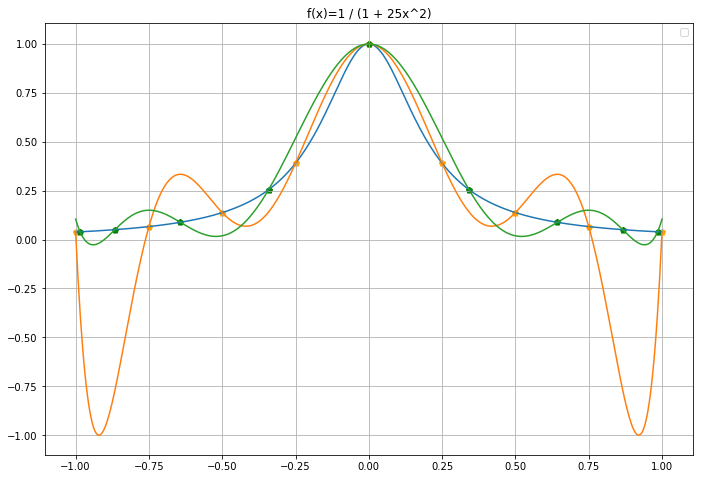

In [18]:
fig = plt.figure()
fig.add_axes([0, 0, 1.5, 1.5])
plt.grid(True)
plt.title('f(x)=1 / (1 + 25x^2)')
plt.legend(['a','b'])

plt.scatter(xk, yk, marker='p', s=40, color='orange')
plt.scatter(xc, yc, marker='p', s=40, color='green')
plt.plot(x,y, x,yL, x,yC)

 - Многочлен Лагранжа со стандартной сеткой дает хорошую аппроксимацию в середине интервала, но ближе к концам график многочлена Лагранжа начинает "скакать"
 - При подстановке точек из многочлена Чебышева, график менее "разболтан" на концах, зато хуже аппроксимирует середину

In [19]:
xk1 = np.linspace(-1, 1, 7)
xk2 = np.linspace(-1, 1, 12)

len(xk1)

7

In [20]:
yk1 = [1 / (1 + 25 * x**2) for x in xk1]
yk2 = [1 / (1 + 25 * x**2) for x in xk2]

len(yk1)

7

In [21]:
yL1 = lag(x,xk1,yk1)
yL2 = lag(x,xk2,yk2)

len(yL1)

500

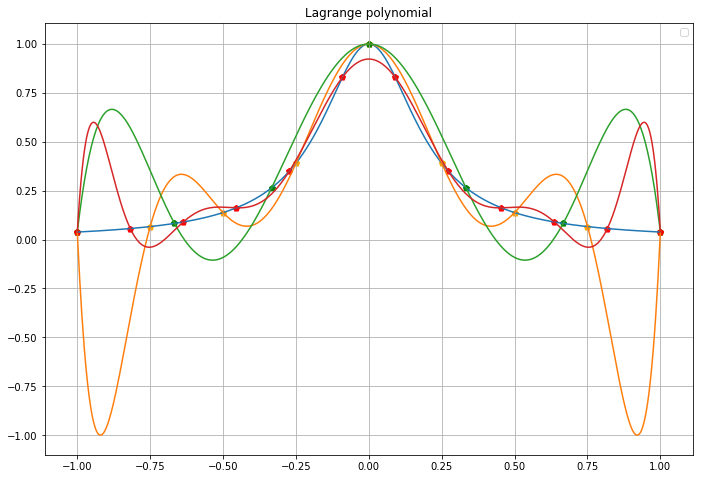

In [22]:
fig = plt.figure()
fig.add_axes([0, 0, 1.5, 1.5])
plt.grid(True)
plt.title('Lagrange polynomial')
plt.legend(['a','b'])

plt.scatter(xk, yk, marker='p', s=40, color='orange')
plt.scatter(xk1, yk1, marker='p', s=40, color='green')
plt.scatter(xk2, yk2, marker='p', s=40, color='red')
plt.plot(x,y, x,yL, x,yL1, x,yL2)

In [23]:
xc1 = cheb(7)
xc2 = cheb(13)

len(xc1)

7

In [24]:
yc1 = [1 / (1 + 25 * x**2) for x in xc1]
yc2 = [1 / (1 + 25 * x**2) for x in xc2]

len (yc1)

7

In [25]:
yC1 = lag(x,xc1,yc1)
yC2 = lag(x,xc2,yc2)

len(yC1)

500

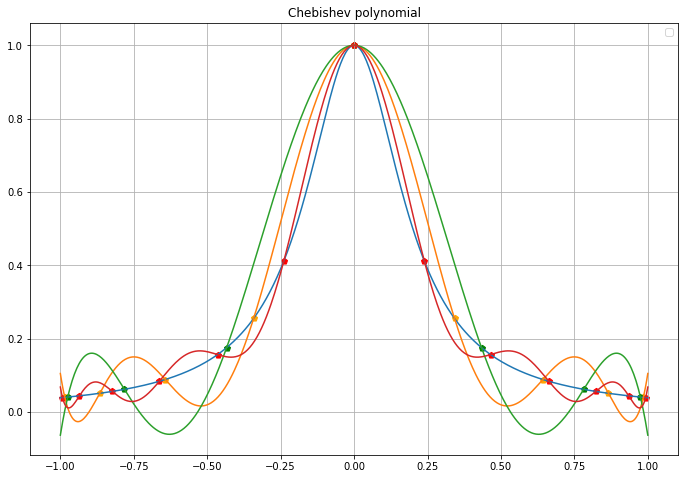

In [26]:
fig = plt.figure()
fig.add_axes([0, 0, 1.5, 1.5])
plt.grid(True)
plt.title('Chebishev polynomial')
plt.legend(['a','b'])

plt.scatter(xc, yc, marker='p', s=40, color='orange')
plt.scatter(xc1, yc1, marker='p', s=40, color='green')
plt.scatter(xc2, yc2, marker='p', s=40, color='red')
plt.plot(x,y, x,yC, x,yC1, x,yC2)